# Distributions

## Histograms

One of the best ways to describe a variable. Shows frequency of the variable.
In Python, we can use a dictionary.

In [113]:
# Given a list of values
t = [1,1,1,1,2,2,2,2,3,3,3,4,4,4,5,5,5,5,5,6,6,6,6]

hist = {}
for value in t:
    hist[value] = hist.get(value,0) + 1
    
# Note: the .get dict method works just like indexing a dict.
# EXCEPT if the key is missing, it will return the default value instead of error

print(hist)

{1: 4, 2: 4, 3: 3, 4: 3, 5: 5, 6: 4}


We can also use the Counter class in the collections module.
A Counter object is a subclass of dictionary.

In [55]:
from collections import Counter
counter = Counter(t)

print(counter)

Counter({5: 5, 1: 4, 2: 4, 6: 4, 3: 3, 4: 3})


For this book, we will use a class called Hist

In [56]:
import thinkstats2

In [57]:
hist = thinkstats2.Hist(t)
print(hist)

Hist({1: 4, 2: 4, 3: 3, 4: 3, 5: 5, 6: 4})


In [58]:
hist.Freq(2)

4

In [59]:
hist[2]

4

In [60]:
hist.Freq(7)

0

In [61]:
hist.Values()

dict_keys([1, 2, 3, 4, 5, 6])

In [62]:
# To loop through values in order - we use the built-in function 'sorted'

for value in sorted(hist.Values()):
    print(value, hist.Freq(value))

1 4
2 4
3 3
4 3
5 5
6 4


In [63]:
sorted(hist.Values())

[1, 2, 3, 4, 5, 6]

In [64]:
# Another way to loop, using the package function 'Items'

for val, freq in hist.Items():
    print(val, freq)

1 4
2 4
3 3
4 3
5 5
6 4


## Plotting Histograms

No handles with labels found to put in legend.


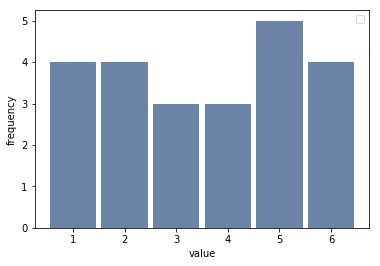

In [65]:
# Using the module provided in the book

import thinkplot
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

When working with a new dataset, explore the variables you are planning to use one at a time. Use a histogram!

In [66]:
import nsfg
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

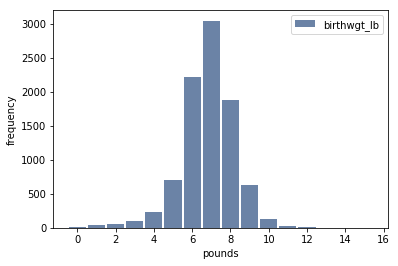

In [67]:
hist = thinkstats2.Hist(live.birthwgt_lb, label ='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

From the histogram above... 
1. The mode is 7.
2. Approximate bell shape - Gaussian distribution with tail that is longer on the left.

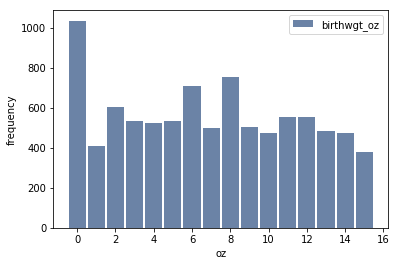

In [68]:
hist = thinkstats2.Hist(live.birthwgt_oz, label ='birthwgt_oz')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='oz', ylabel='frequency')

From the histogram above... (expected a uniform distribution for birth oz)
1. The mode is 0. This is due to rounding to nearest integer (lbs)
2. We see less 1 and 15 (also from respondents rounding)

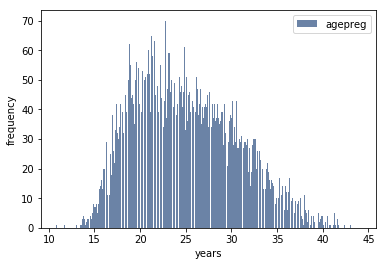

In [69]:
hist = thinkstats2.Hist(live.agepreg, label ='agepreg')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='years', ylabel='frequency')

From the histrogram above... 
1. The mode is 21 years.
2. The distribution is roughly bell-shape but longer tail on the right.

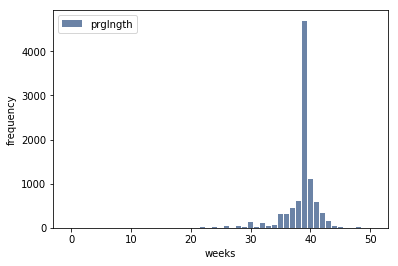

In [70]:
hist = thinkstats2.Hist(live.prglngth, label ='prglngth')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='weeks', ylabel='frequency')

From the histogram above...
1. Mode is 39 weeks. By far.
2. Left tail is longer than the right. Early babies common. Doctors often intervene for preganancies past 43 weeks.

## Outliers

Its a good idea to check for outliers - extreme values that might be errors or rare events.

In [71]:
# The Largest/Smallest method returns the n largest/smallest values from the histogram.

for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


Values below 10 weeks are certainly erros (most likely coded incorerectly).
Between 10 and 30 weeks, its hard to be sure.

In [72]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


Most doctors recommend induced labor past 42 weeks. 50 weeks seems medically unlikely.

### Dealing with Outliers

The best way to handle outliers depends on "domain knowledge". 

## First babies

Our question is whether first babies tend to be early or late. We are interested only in full-term pregnancies so we focus on pregnancies longer than 27 weeks.

We can compare the distribution of pregnancy lengths for first babies and others.

In [116]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [123]:
first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)

No handles with labels found to put in legend.


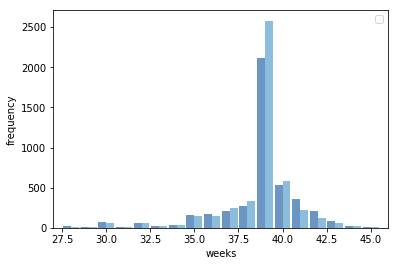

In [125]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='weeks', ylabel='frequency', xlim=[27, 46])

Histrograms are not the best choice for comparing two distributions. In this example, there are fewer "first babies" than "others" so some of the apparent differences in the histograms are due to sample sizes.

## Summarizing Distributions

A histogram is a complete description of the distribution of a sample. We often want to summarize the distribution with a few descriptive statistics.

1. central tendency
2. modes
3. spread
4. tails
5. outliers

Summary statistics help answer these questions. 

### Mean Or Average

These are sometimes used interchangeable but here is the distinction.
<br><br>
$\overline{x} = \frac{1}{n}\sum_{i}x_i$
<br><br>
1. "mean" of a sample is the summary statistic computed with a mean formula.
2. "average" of a sample is one of the several summary statistics you might choose to describe a central tendency. 

### Variance

Variance is the mean squared deviation. So square root of variance is standard deviation.
<br><br>
$S^2 = \frac{1}{n}\sum_{i}(x_i-\overline{x})^2$
<br><br>
If a standard deviation is 2.7 weeks, we should expect deviations of 2-3 weeks to be common.
<br>
Variance is 7.3 weeks. This is harder to interpret but useful in some calculations.

### Effect size

Summary statistic intended to describe the size of an effect.<br>
An example is using the difference between two groups' means.

Mean pregnancy length for first babies is 38.601 and for other babies it is 38.523.<br>
The difference is about 0.2%. 

#### Cohen's *d*

This is a statistic to compare the difference between groups to variability within groups.

$d = \frac{\overline{x}_1-\overline{x}_2}{s}$

s is the "pooled standard deviation"

In [130]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d